In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS

In [5]:
df = pd.read_json('datasets_clean/df_games_EDA.json', lines=True)

In [15]:
df

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,anio_lanzamiento
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0,761140,Kotoshiro,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0,643980,Secret Level SRL,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0,670290,Poolians.com,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0,767400,彼岸领域,2017
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0,772540,Trickjump Games Ltd,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27458,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,0,745400,Bidoniera Games,2018
27459,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0,773640,"Nikita ""Ghost_RUS""",2018
27460,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0,733530,Sacada,2018
27461,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0,610660,Laush Dmitriy Sergeevich,2018


Se cuentan el numeero de filas y columnas para saber el volumen de datos que estamos manejando.

In [7]:
filas, columnas = df.shape
print(f'Existen {filas} filas y {columnas} columnas')

Existen 27463 filas y 13 columnas


Describimos todo el dataset para darnos un vistazo general de los datos del mismo.

In [8]:
df.describe(include='all')

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
count,22819,27463,27463,27463,27463,27463,27450,27462,27183,27463.00,27463.000000,27463,27463
unique,7917,855,27443,27443,27463,3243,13151,27461,3570,149.00,NaN,27462,10603
top,Ubisoft,[Action],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"[Casual, Simulation]",http://steamcommunity.com/app/612880/reviews/?...,[Single-player],4.99,NaN,612880,Ubisoft - San Francisco
freq,368,1783,3,3,1,100,1288,2,2651,3829.00,NaN,2,1258
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050322,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218613,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


En la siguiente grafica podemos observar las fechas en las que mas juegos fueron estrenados y donde podemos observar que en el periodo de 2017 es donde se estrenaron mas juegos.

<Axes: xlabel='release_date'>

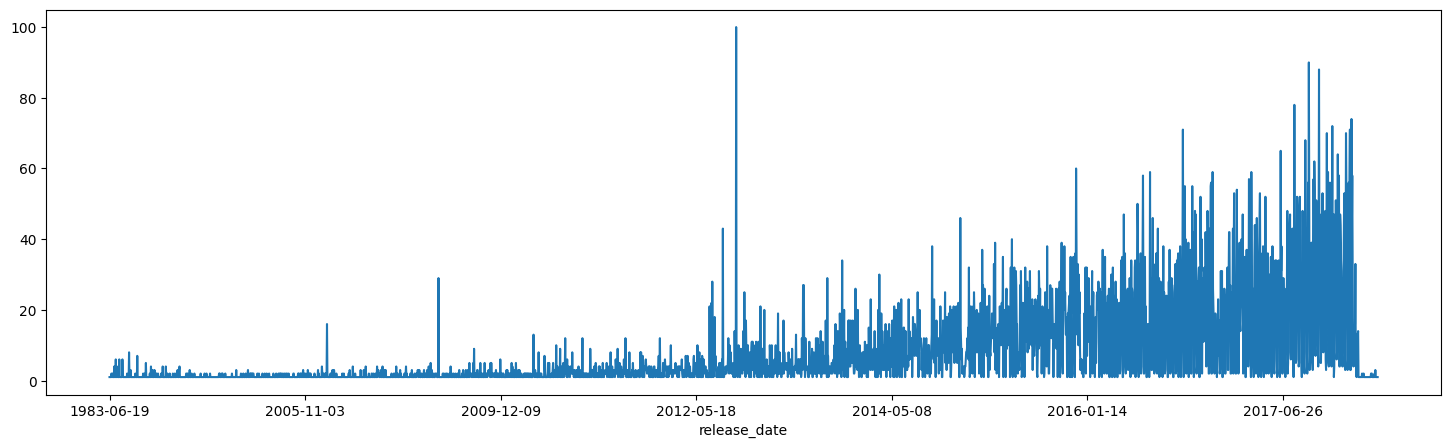

In [9]:
anios = df.groupby('release_date')['app_name'].count()
plt.figure(figsize=(18,5))
anios.plot()

En la siguiente grafica podemos observar la distribución de los generos en los videojuegos, nos damos cuenta que el genero predominante dentro de este dataset es Indie, mientras que el genero con menor numero de peliculas es el genero Accouting

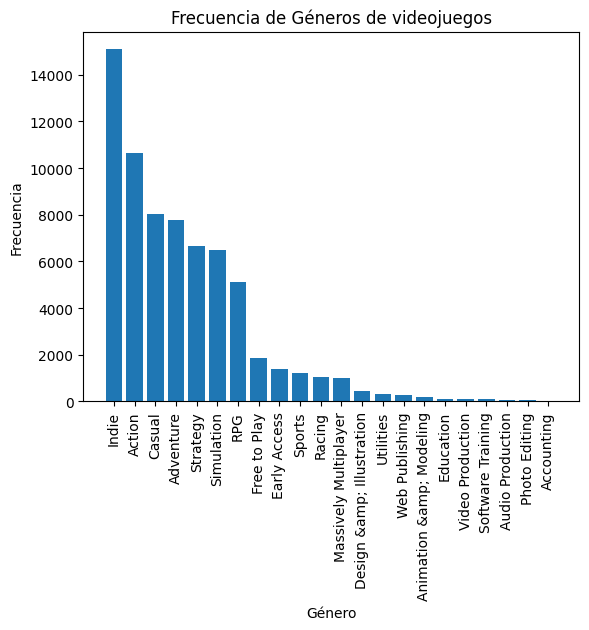

In [10]:
count_dict = {}
for genres_list in df['genres']:
    if isinstance(genres_list, list):
        for genre in genres_list:
            if genre in count_dict:
                count_dict[genre] += 1
            else:
                count_dict[genre] = 1
    elif pd.isnull(genres_list):  # Para contar los valores None
        if '' in count_dict:
            count_dict[''] += 1
        else:
            count_dict[''] = 1

# Ordenar el diccionario en orden descendente por la frecuencia de los géneros
sorted_count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Convertir el diccionario ordenado de frecuencias en listas para graficar
genre_names = list(sorted_count_dict.keys())
genre_counts = list(sorted_count_dict.values())

# Crear la gráfica de barras
plt.bar(genre_names, genre_counts)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros de videojuegos')
plt.xticks(rotation=90)
plt.show()

In [16]:
df = df[['app_name']].dropna()

Posteriormente creamos una nube de palabras en base a la columna app_name para darnos cuenta que las palbras que mas se repiten en los titulos es Soundtrack, Fantasy, Pack y Ground

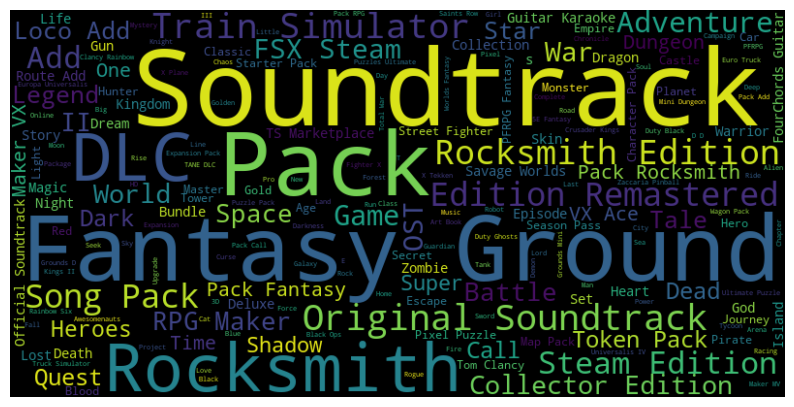

In [17]:
texto = ' '.join(df['app_name'])
wordcloud = WordCloud(width=800, height=400).generate(texto)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()